In [1]:
%matplotlib inline

# Importing some tools for loading data and plotting
import matplotlib.pyplot as plt   # plotting tools
import numpy as np                # numpy for math on arrays
import pandas as pd    # pandas gives us DataFrames
import seaborn as sns  # seaborn helps us plot more easily

# This is the clustering algorithm we will try to understand - KMeans
from sklearn.neighbors import KNeighborsClassifier

# The metrics package helps us evaluate our clustering approach. 
from sklearn import metrics

In [2]:
# Step 1: load the data. It is formatted in "comma-separated values" format, or "csv"
wine_df = pd.read_csv('wine_data_clubes.csv')

# Step 2: let's take a look at the beginning of the data.
wine_df.head()

,class,alcohol,malic,ash,mg,hue,od_ratio,proline
0,1,14.23,1.71,2.43,127,1.04,3.92,1065
1,1,13.20,1.78,2.14,100,1.05,3.40,1050
2,1,13.16,2.36,2.67,101,1.03,3.17,1185
3,1,14.37,1.95,2.50,113,0.86,3.45,1480
4,1,13.24,2.59,2.87,118,1.04,2.93,735


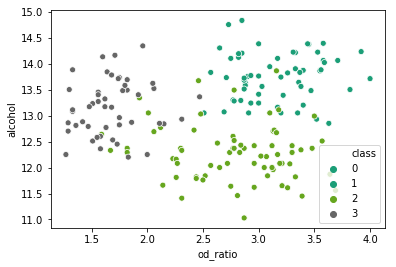

In [3]:
# We already chose to use od_ratio and alcohol
sns.scatterplot(data=wine_df, x='od_ratio', y='alcohol', # scatter of alcohol vs od_ratio
                hue='class',      # color by which wine it is.
                palette='Dark2')  # use darker colors to make it easier to see. 

In [4]:
# Setup - we will make a train and test set.
# using od_ratio and alcohol variables
cols = ['class', 'od_ratio', 'alcohol']
whole_dataset = wine_df[cols].copy()

# We will grab 17 wines evenly spaced through the dataset for the test set.
# We do this because the data is in a particular order, so grabbing from the end will give us all one type of wine. 
subset = np.arange(0, 178, 10)
test_set = whole_dataset.iloc[subset].copy()

# The remaining wines (after dropping those ten) are
train_set = whole_dataset.drop(subset, axis=0)

# We ask the algorithm to "fit" the data that we have, i.e. learn from it. 
train_cols = ['od_ratio', 'alcohol']
target_col = 'class'

# Reminder: this is "supervised learning" so the training algorithm
# knows the right answer. 
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(train_set[train_cols], train_set[target_col])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [5]:
# Now we ask KNN to predict classes that same data
pred = knn.predict(test_set[train_cols])

# Save the prediction with the test set
test_set['predicted_class'] = pred

# Let's take a look
test_set

,class,od_ratio,alcohol,predicted_class
0,1,3.92,14.23,1
10,1,3.17,14.10,1
20,1,3.71,14.06,1
30,1,2.71,13.73,1
40,1,3.38,13.56,1
50,1,2.91,13.05,1
60,2,1.67,12.33,3
70,2,1.82,12.29,3
80,2,3.12,12.00,2
90,2,2.27,12.08,2


In [6]:
# Now it is much more natural to get an accuracy score because the labels for 
# the classes and the predicted classes are the same. This is because we are using 
# a supervised learning approach, which is more appropriate to this case.
metrics.accuracy_score(test_set['class'], test_set['predicted_class'])

0.83333333333333337

## Excercise
Do you think that you can improve accuracy? 
Some suggestions for how to do this
* Use more than two columns to train the KNN model.
* Use different parameters to KNN, for example more neighbors or a different "distance metric"

You can read the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) to learn more about KNeighborsClassifier.
